**Online news article data- II- Fourteen classes**

In [2]:
import pandas as AAD

ON_NeWs_ATL_I = AAD.read_csv('ON_NeWs_ATL_II.csv')
ON_NeWs_ATL_I

,category,body
0,ARTS & CULTURE,octob carolyn kramer receiv disturb phone call...
1,ARTS & CULTURE,week talk actor jeff hiller hit broadway play ...
2,ARTS & CULTURE,new yorker take presid donald trump ask u woul...
3,ARTS & CULTURE,kellen hickey year old live hudson wisconsin g...
4,ARTS & CULTURE,someth combin tradit uptight look renaiss peri...
...,...,...
6810,WOMEN,still think tuesday night dinner year old daug...
6811,WOMEN,rememb morn high school graduat clearli put wh...
6812,WOMEN,husband gene wear pajama ask told never pajama...
6813,WOMEN,antonioguillem via thinkstock lisa donoghu lin...


In [3]:
import warnings as DDD
DDD.filterwarnings("ignore")

In [4]:
ON_NeWs_ATL_I.category.value_counts()

ARTS & CULTURE    1000
BUSINESS           501
POLITICS           501
RELIGION           501
SPORTS             501
WOMEN              501
TECH               500
ENTERTAINMENT      497
EDUCATION          490
ENVIRONMENT        452
COMEDY             376
SCIENCE            350
MEDIA              346
CRIME              299
Name: category, dtype: int64

* Fourteen classes in output category

In [5]:
o_ON_NeWs_ATL= ON_NeWs_ATL_I['category']

In [6]:
from sklearn.feature_extraction.text import CountVectorizer as CCV

CCV_L = CCV(analyzer='char')
i_ON_NeWs_ATL = CCV_L.fit_transform(ON_NeWs_ATL_I['body'].values.astype('U')).toarray()
i_ON_NeWs_ATL

array([[1806,  861,  157, ...,   49,  119,    8],
       [ 205,   85,   32, ...,    2,   19,    1],
       [ 188,   80,   12, ...,    2,   11,    3],
       ...,
       [ 277,  131,   12, ...,    6,   14,    1],
       [ 536,  218,   37, ...,    6,   43,    7],
       [ 413,  133,   21, ...,    6,   16,    0]])

In [7]:
from sklearn.model_selection import train_test_split as LLR

ir_ON_NeWs_ATL, is_ON_NeWs_ATL, or_ON_NeWs_ATL, os_ON_NeWs_ATL = LLR(i_ON_NeWs_ATL, o_ON_NeWs_ATL, test_size= 0.4, random_state= 223)
iv_ON_NeWs_ATL, is_ON_NeWs_ATL, ov_ON_NeWs_ATL, os_ON_NeWs_ATL = LLR(is_ON_NeWs_ATL, os_ON_NeWs_ATL, test_size= 0.5, random_state= 223)

In [8]:
ir_ON_NeWs_ATL.shape #      train

(4089, 27)

In [9]:
iv_ON_NeWs_ATL.shape #          Validation

(1363, 27)

In [10]:
is_ON_NeWs_ATL.shape #      test

(1363, 27)

## **Machine Learning Algorithms**

In [11]:
from sklearn.metrics import classification_report as Mteric1
from sklearn.metrics import confusion_matrix as Mteric2
from sklearn.metrics import ConfusionMatrixDisplay as Mteric3
import time as Mteric4
from sklearn.model_selection import GridSearchCV as GGR

**Logistic Regression**


In [12]:
from sklearn.linear_model import LogisticRegression as Mteric5

ONA_K = {'penalty': ['l1', 'l2', 'elasticnet', None],
            'multi_class': ['auto', 'ovr', 'multinomial']}

ONA_KM = Mteric5(random_state= 223)
ONA_KM = GGR(ONA_KM, ONA_K, cv=2 )
ONA_KM.fit(ir_ON_NeWs_ATL[:500],or_ON_NeWs_ATL[:500])

print(ONA_KM.best_params_)
print(ONA_KM.best_score_)

{'multi_class': 'ovr', 'penalty': 'l2'}
0.272


In [13]:
Mteric_s = Mteric4.time()

Mo_News = Mteric5(**ONA_KM.best_params_)
Mo_News.fit(ir_ON_NeWs_ATL, or_ON_NeWs_ATL)

Mteric_d = Mteric4.time()
print("time-dur-training =", Mteric_d- Mteric_s)
Mo_News

time-dur-training = 1.0396900177001953


LogisticRegression(multi_class='ovr')

                precision    recall  f1-score   support

ARTS & CULTURE       0.39      0.51      0.44       184
      BUSINESS       0.30      0.22      0.26       112
        COMEDY       0.55      0.48      0.51        79
         CRIME       0.30      0.22      0.26        72
     EDUCATION       0.36      0.56      0.44        98
 ENTERTAINMENT       0.27      0.32      0.29       107
   ENVIRONMENT       0.23      0.12      0.16        96
         MEDIA       0.21      0.06      0.09        84
      POLITICS       0.21      0.41      0.28        95
      RELIGION       0.38      0.32      0.35       107
       SCIENCE       0.33      0.27      0.30        74
        SPORTS       0.23      0.18      0.20        76
          TECH       0.35      0.22      0.27        89
         WOMEN       0.21      0.24      0.22        90

      accuracy                           0.31      1363
     macro avg       0.31      0.30      0.29      1363
  weighted avg       0.31      0.31      0.30 

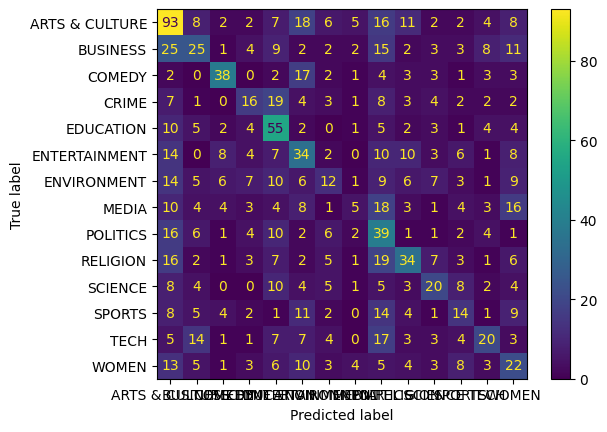

In [15]:
Mteric_s = Mteric4.time()

pe_ON_NeWs_ATL = Mo_News.predict(iv_ON_NeWs_ATL)
print(Mteric1(ov_ON_NeWs_ATL,pe_ON_NeWs_ATL))
L = Mteric2(ov_ON_NeWs_ATL,pe_ON_NeWs_ATL)
D = Mteric3(confusion_matrix = L, display_labels = ['ARTS & CULTURE','BUSINESS','COMEDY','CRIME','EDUCATION', 'ENTERTAINMENT','ENVIRONMENT','MEDIA','POLITICS','RELIGION','SCIENCE','SPORTS','TECH','WOMEN'])
D.plot()

Mteric_d = Mteric4.time()
print("time-dur-validating =", Mteric_d- Mteric_s)

                precision    recall  f1-score   support

ARTS & CULTURE       0.43      0.49      0.46       209
      BUSINESS       0.18      0.13      0.15        92
        COMEDY       0.58      0.49      0.53        69
         CRIME       0.42      0.31      0.36        67
     EDUCATION       0.42      0.61      0.50       102
 ENTERTAINMENT       0.21      0.31      0.25        84
   ENVIRONMENT       0.21      0.16      0.18        96
         MEDIA       0.09      0.03      0.04        73
      POLITICS       0.19      0.44      0.27        80
      RELIGION       0.49      0.42      0.45       120
       SCIENCE       0.27      0.24      0.26        70
        SPORTS       0.36      0.19      0.25        99
          TECH       0.31      0.18      0.23       101
         WOMEN       0.30      0.39      0.34       101

      accuracy                           0.33      1363
     macro avg       0.32      0.31      0.30      1363
  weighted avg       0.33      0.33      0.32 

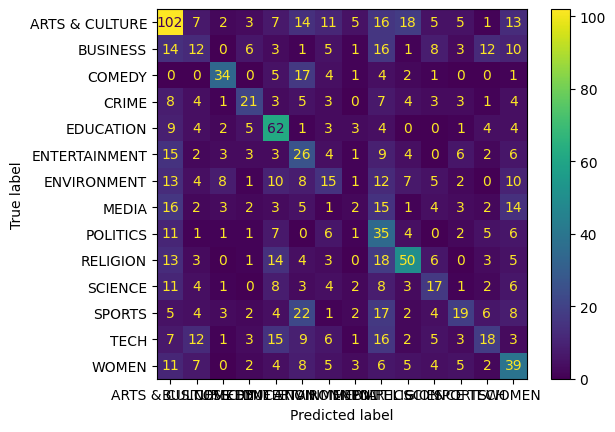

In [16]:
Mteric_s = Mteric4.time()

pe_ON_NeWs_ATL = Mo_News.predict(is_ON_NeWs_ATL)
print(Mteric1(os_ON_NeWs_ATL,pe_ON_NeWs_ATL))
L = Mteric2(os_ON_NeWs_ATL,pe_ON_NeWs_ATL)
D = Mteric3(confusion_matrix = L, display_labels = ['ARTS & CULTURE','BUSINESS','COMEDY','CRIME','EDUCATION', 'ENTERTAINMENT','ENVIRONMENT','MEDIA','POLITICS','RELIGION','SCIENCE','SPORTS','TECH','WOMEN'])
D.plot()

Mteric_d = Mteric4.time()
print("time-dur-testing =", Mteric_d- Mteric_s)

**SVM**


In [17]:
from sklearn.svm import SVC as Mteric6

ONA_K = {'max_iter': [1, -1, 2, 3],
            'decision_function_shape': ['ovo', 'ovr'],
         'kernel': ['sigmpid', 'poly', 'rbf']}

ONA_KM = Mteric6(random_state= 223)
ONA_KM = GGR(ONA_KM, ONA_K, cv=2 )
ONA_KM.fit(ir_ON_NeWs_ATL[:500],or_ON_NeWs_ATL[:500])

print(ONA_KM.best_params_)
print(ONA_KM.best_score_)

{'decision_function_shape': 'ovo', 'kernel': 'rbf', 'max_iter': -1}
0.19


In [18]:
Mteric_s = Mteric4.time()

Mo_News = Mteric6(**ONA_KM.best_params_)
Mo_News.fit(ir_ON_NeWs_ATL, or_ON_NeWs_ATL)

Mteric_d = Mteric4.time()
print("time-dur-training =", Mteric_d- Mteric_s)
Mo_News

time-dur-training = 6.278104782104492


SVC(decision_function_shape='ovo')

                precision    recall  f1-score   support

ARTS & CULTURE       0.18      0.83      0.30       184
      BUSINESS       0.52      0.10      0.17       112
        COMEDY       0.41      0.80      0.54        79
         CRIME       0.00      0.00      0.00        72
     EDUCATION       0.51      0.41      0.45        98
 ENTERTAINMENT       0.17      0.28      0.21       107
   ENVIRONMENT       0.00      0.00      0.00        96
         MEDIA       0.00      0.00      0.00        84
      POLITICS       0.41      0.07      0.12        95
      RELIGION       0.00      0.00      0.00       107
       SCIENCE       0.00      0.00      0.00        74
        SPORTS       0.10      0.07      0.08        76
          TECH       1.00      0.01      0.02        89
         WOMEN       0.41      0.10      0.16        90

      accuracy                           0.23      1363
     macro avg       0.27      0.19      0.15      1363
  weighted avg       0.27      0.23      0.16 

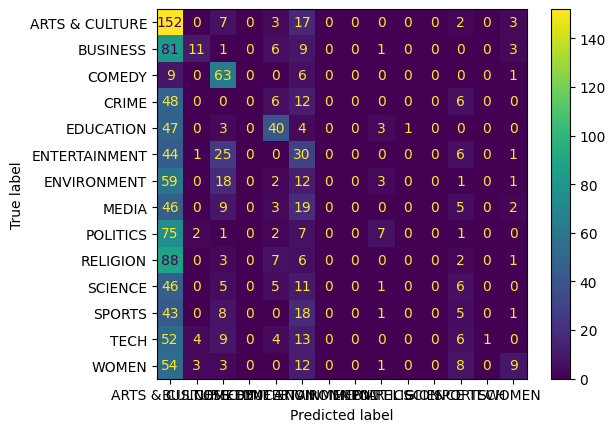

In [19]:
Mteric_s = Mteric4.time()

pe_ON_NeWs_ATL = Mo_News.predict(iv_ON_NeWs_ATL)
print(Mteric1(ov_ON_NeWs_ATL,pe_ON_NeWs_ATL))
L = Mteric2(ov_ON_NeWs_ATL,pe_ON_NeWs_ATL)
D = Mteric3(confusion_matrix = L, display_labels = ['ARTS & CULTURE','BUSINESS','COMEDY','CRIME','EDUCATION', 'ENTERTAINMENT','ENVIRONMENT','MEDIA','POLITICS','RELIGION','SCIENCE','SPORTS','TECH','WOMEN'])
D.plot()

Mteric_d = Mteric4.time()
print("time-dur-validating =", Mteric_d- Mteric_s)

                precision    recall  f1-score   support

ARTS & CULTURE       0.22      0.87      0.35       209
      BUSINESS       0.19      0.04      0.07        92
        COMEDY       0.37      0.80      0.50        69
         CRIME       0.00      0.00      0.00        67
     EDUCATION       0.51      0.45      0.48       102
 ENTERTAINMENT       0.14      0.29      0.18        84
   ENVIRONMENT       0.00      0.00      0.00        96
         MEDIA       0.00      0.00      0.00        73
      POLITICS       0.60      0.04      0.07        80
      RELIGION       1.00      0.03      0.05       120
       SCIENCE       0.00      0.00      0.00        70
        SPORTS       0.21      0.12      0.15        99
          TECH       0.50      0.01      0.02       101
         WOMEN       0.33      0.07      0.11       101

      accuracy                           0.25      1363
     macro avg       0.29      0.19      0.14      1363
  weighted avg       0.31      0.25      0.16 

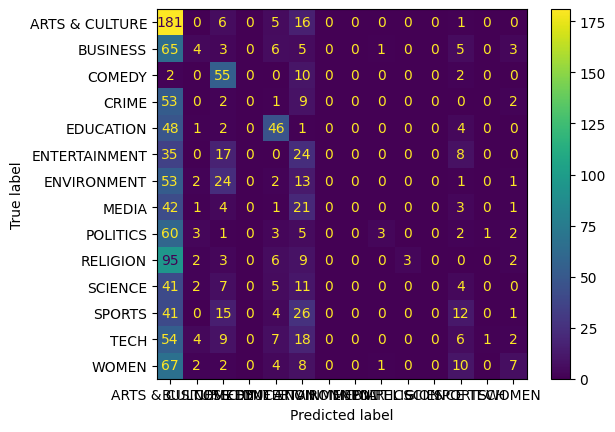

In [20]:
Mteric_s = Mteric4.time()

pe_ON_NeWs_ATL = Mo_News.predict(is_ON_NeWs_ATL)
print(Mteric1(os_ON_NeWs_ATL,pe_ON_NeWs_ATL))
L = Mteric2(os_ON_NeWs_ATL,pe_ON_NeWs_ATL)
D = Mteric3(confusion_matrix = L, display_labels = ['ARTS & CULTURE','BUSINESS','COMEDY','CRIME','EDUCATION', 'ENTERTAINMENT','ENVIRONMENT','MEDIA','POLITICS','RELIGION','SCIENCE','SPORTS','TECH','WOMEN'])
D.plot()

Mteric_d = Mteric4.time()
print("time-dur-testing =", Mteric_d- Mteric_s)

**Decision Tree**


In [21]:
from sklearn.tree import DecisionTreeClassifier as Mteric7

ONA_K = {'criterion': ['gini', 'entropy', 'log_loss'],
            'max_features': ['auto', 'sqrt', 'log2']}

ONA_KM = Mteric7(random_state= 223)
ONA_KM = GGR(ONA_KM, ONA_K, cv=2 )
ONA_KM.fit(ir_ON_NeWs_ATL[:500],or_ON_NeWs_ATL[:500])

print(ONA_KM.best_params_)
print(ONA_KM.best_score_)

{'criterion': 'entropy', 'max_features': 'auto'}
0.134


In [22]:
Mteric_s = Mteric4.time()

Mo_News = Mteric7(**ONA_KM.best_params_)
Mo_News.fit(ir_ON_NeWs_ATL, or_ON_NeWs_ATL)

Mteric_d = Mteric4.time()
print("time-dur-training =", Mteric_d- Mteric_s)
Mo_News

time-dur-training = 0.08354544639587402


DecisionTreeClassifier(criterion='entropy', max_features='auto')

                precision    recall  f1-score   support

ARTS & CULTURE       0.25      0.27      0.26       184
      BUSINESS       0.18      0.17      0.18       112
        COMEDY       0.45      0.42      0.43        79
         CRIME       0.06      0.06      0.06        72
     EDUCATION       0.21      0.18      0.20        98
 ENTERTAINMENT       0.21      0.20      0.20       107
   ENVIRONMENT       0.07      0.06      0.07        96
         MEDIA       0.17      0.12      0.14        84
      POLITICS       0.11      0.12      0.11        95
      RELIGION       0.18      0.17      0.17       107
       SCIENCE       0.08      0.08      0.08        74
        SPORTS       0.09      0.11      0.10        76
          TECH       0.09      0.10      0.09        89
         WOMEN       0.11      0.16      0.13        90

      accuracy                           0.17      1363
     macro avg       0.16      0.16      0.16      1363
  weighted avg       0.17      0.17      0.17 

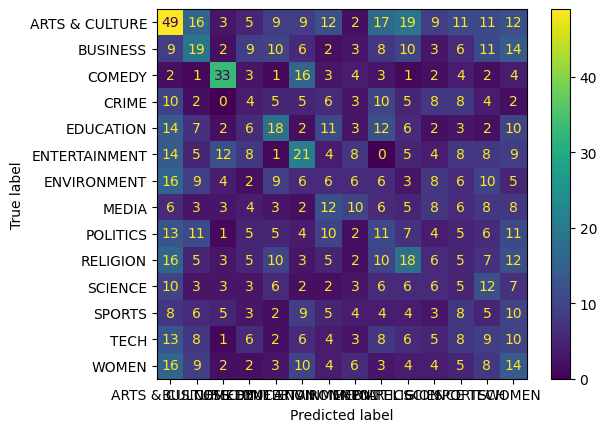

In [23]:
Mteric_s = Mteric4.time()

pe_ON_NeWs_ATL = Mo_News.predict(iv_ON_NeWs_ATL)
print(Mteric1(ov_ON_NeWs_ATL,pe_ON_NeWs_ATL))
L = Mteric2(ov_ON_NeWs_ATL,pe_ON_NeWs_ATL)
D = Mteric3(confusion_matrix = L, display_labels = ['ARTS & CULTURE','BUSINESS','COMEDY','CRIME','EDUCATION', 'ENTERTAINMENT','ENVIRONMENT','MEDIA','POLITICS','RELIGION','SCIENCE','SPORTS','TECH','WOMEN'])
D.plot()

Mteric_d = Mteric4.time()
print("time-dur-validating =", Mteric_d- Mteric_s)

                precision    recall  f1-score   support

ARTS & CULTURE       0.24      0.28      0.26       209
      BUSINESS       0.14      0.17      0.15        92
        COMEDY       0.46      0.46      0.46        69
         CRIME       0.08      0.06      0.07        67
     EDUCATION       0.28      0.22      0.24       102
 ENTERTAINMENT       0.15      0.19      0.17        84
   ENVIRONMENT       0.12      0.10      0.11        96
         MEDIA       0.02      0.01      0.01        73
      POLITICS       0.12      0.14      0.13        80
      RELIGION       0.24      0.18      0.21       120
       SCIENCE       0.07      0.07      0.07        70
        SPORTS       0.17      0.16      0.16        99
          TECH       0.09      0.09      0.09       101
         WOMEN       0.13      0.13      0.13       101

      accuracy                           0.17      1363
     macro avg       0.16      0.16      0.16      1363
  weighted avg       0.17      0.17      0.17 

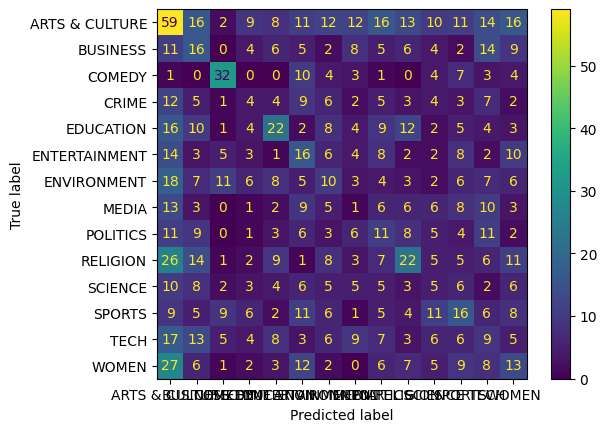

In [24]:
Mteric_s = Mteric4.time()

pe_ON_NeWs_ATL = Mo_News.predict(is_ON_NeWs_ATL)
print(Mteric1(os_ON_NeWs_ATL,pe_ON_NeWs_ATL))
L = Mteric2(os_ON_NeWs_ATL,pe_ON_NeWs_ATL)
D = Mteric3(confusion_matrix = L, display_labels = ['ARTS & CULTURE','BUSINESS','COMEDY','CRIME','EDUCATION', 'ENTERTAINMENT','ENVIRONMENT','MEDIA','POLITICS','RELIGION','SCIENCE','SPORTS','TECH','WOMEN'])
D.plot()

Mteric_d = Mteric4.time()
print("time-dur-testing =", Mteric_d- Mteric_s)

**Random Forest**


In [25]:
from sklearn.ensemble import RandomForestClassifier as Mteric8

ONA_K = {'criterion': ['gini', 'entropy', 'log_loss'],
            'max_features': ['auto', 'sqrt', 'log2']}

ONA_KM = Mteric8(random_state= 223)
ONA_KM = GGR(ONA_KM, ONA_K, cv=2 )
ONA_KM.fit(ir_ON_NeWs_ATL[:500],or_ON_NeWs_ATL[:500])

print(ONA_KM.best_params_)
print(ONA_KM.best_score_)

{'criterion': 'entropy', 'max_features': 'log2'}
0.22


In [26]:
Mteric_s = Mteric4.time()

Mo_News = Mteric8(**ONA_KM.best_params_)
Mo_News.fit(ir_ON_NeWs_ATL, or_ON_NeWs_ATL)

Mteric_d = Mteric4.time()
print("time-dur-training =", Mteric_d- Mteric_s)
Mo_News

time-dur-training = 2.47853422164917


RandomForestClassifier(criterion='entropy', max_features='log2')

                precision    recall  f1-score   support

ARTS & CULTURE       0.25      0.58      0.35       184
      BUSINESS       0.35      0.28      0.31       112
        COMEDY       0.51      0.76      0.61        79
         CRIME       0.39      0.12      0.19        72
     EDUCATION       0.50      0.53      0.51        98
 ENTERTAINMENT       0.24      0.29      0.26       107
   ENVIRONMENT       0.24      0.05      0.09        96
         MEDIA       0.46      0.07      0.12        84
      POLITICS       0.21      0.24      0.22        95
      RELIGION       0.32      0.20      0.24       107
       SCIENCE       0.25      0.09      0.14        74
        SPORTS       0.19      0.21      0.20        76
          TECH       0.27      0.24      0.25        89
         WOMEN       0.29      0.24      0.26        90

      accuracy                           0.30      1363
     macro avg       0.32      0.28      0.27      1363
  weighted avg       0.31      0.30      0.28 

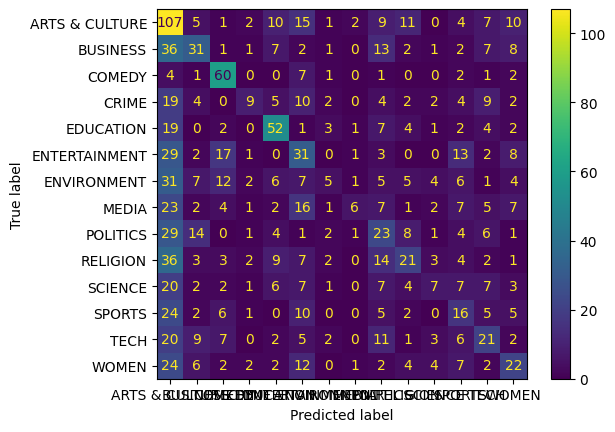

In [27]:
Mteric_s = Mteric4.time()

pe_ON_NeWs_ATL = Mo_News.predict(iv_ON_NeWs_ATL)
print(Mteric1(ov_ON_NeWs_ATL,pe_ON_NeWs_ATL))
L = Mteric2(ov_ON_NeWs_ATL,pe_ON_NeWs_ATL)
D = Mteric3(confusion_matrix = L, display_labels = ['ARTS & CULTURE','BUSINESS','COMEDY','CRIME','EDUCATION', 'ENTERTAINMENT','ENVIRONMENT','MEDIA','POLITICS','RELIGION','SCIENCE','SPORTS','TECH','WOMEN'])
D.plot()

Mteric_d = Mteric4.time()
print("time-dur-validating =", Mteric_d- Mteric_s)

                precision    recall  f1-score   support

ARTS & CULTURE       0.31      0.62      0.42       209
      BUSINESS       0.19      0.16      0.18        92
        COMEDY       0.41      0.65      0.51        69
         CRIME       0.55      0.18      0.27        67
     EDUCATION       0.46      0.49      0.48       102
 ENTERTAINMENT       0.19      0.27      0.23        84
   ENVIRONMENT       0.29      0.06      0.10        96
         MEDIA       0.45      0.07      0.12        73
      POLITICS       0.23      0.34      0.27        80
      RELIGION       0.47      0.28      0.35       120
       SCIENCE       0.24      0.10      0.14        70
        SPORTS       0.25      0.24      0.25        99
          TECH       0.35      0.30      0.32       101
         WOMEN       0.30      0.25      0.27       101

      accuracy                           0.32      1363
     macro avg       0.34      0.29      0.28      1363
  weighted avg       0.33      0.32      0.29 

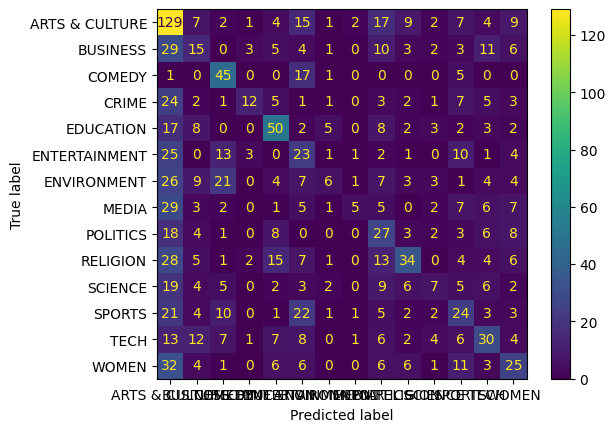

In [28]:
Mteric_s = Mteric4.time()

pe_ON_NeWs_ATL = Mo_News.predict(is_ON_NeWs_ATL)
print(Mteric1(os_ON_NeWs_ATL,pe_ON_NeWs_ATL))
L = Mteric2(os_ON_NeWs_ATL,pe_ON_NeWs_ATL)
D = Mteric3(confusion_matrix = L, display_labels = ['ARTS & CULTURE','BUSINESS','COMEDY','CRIME','EDUCATION', 'ENTERTAINMENT','ENVIRONMENT','MEDIA','POLITICS','RELIGION','SCIENCE','SPORTS','TECH','WOMEN'])
D.plot()

Mteric_d = Mteric4.time()
print("time-dur-testing =", Mteric_d- Mteric_s)

**Gradient Boosting**

In [29]:
from sklearn.ensemble import GradientBoostingClassifier as Mteric9

ONA_K = {'criterion': ['friedman_mse', 'squared_error'],
            'max_features': ['sqrt', 'log2']}

ONA_KM = Mteric9(random_state= 223)
ONA_KM = GGR(ONA_KM, ONA_K, cv=2 )
ONA_KM.fit(ir_ON_NeWs_ATL[:500],or_ON_NeWs_ATL[:500])

print(ONA_KM.best_params_)
print(ONA_KM.best_score_)

{'criterion': 'squared_error', 'max_features': 'log2'}
0.20400000000000001


In [30]:
Mteric_s = Mteric4.time()

Mo_News = Mteric9(**ONA_KM.best_params_)
Mo_News.fit(ir_ON_NeWs_ATL, or_ON_NeWs_ATL)

Mteric_d = Mteric4.time()
print("time-dur-training =", Mteric_d- Mteric_s)
Mo_News

time-dur-training = 16.44933319091797


GradientBoostingClassifier(criterion='squared_error', max_features='log2')

                precision    recall  f1-score   support

ARTS & CULTURE       0.29      0.58      0.39       184
      BUSINESS       0.34      0.25      0.29       112
        COMEDY       0.52      0.65      0.57        79
         CRIME       0.41      0.24      0.30        72
     EDUCATION       0.48      0.44      0.46        98
 ENTERTAINMENT       0.26      0.28      0.27       107
   ENVIRONMENT       0.16      0.04      0.07        96
         MEDIA       0.09      0.02      0.04        84
      POLITICS       0.27      0.29      0.28        95
      RELIGION       0.46      0.30      0.36       107
       SCIENCE       0.20      0.14      0.16        74
        SPORTS       0.20      0.26      0.22        76
          TECH       0.26      0.29      0.28        89
         WOMEN       0.23      0.26      0.24        90

      accuracy                           0.31      1363
     macro avg       0.30      0.29      0.28      1363
  weighted avg       0.30      0.31      0.29 

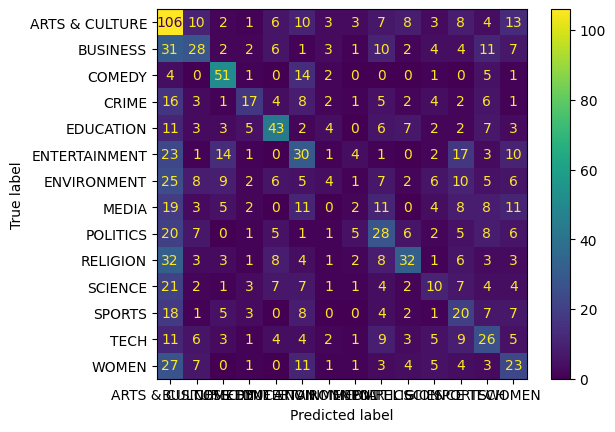

In [31]:
Mteric_s = Mteric4.time()

pe_ON_NeWs_ATL = Mo_News.predict(iv_ON_NeWs_ATL)
print(Mteric1(ov_ON_NeWs_ATL,pe_ON_NeWs_ATL))
L = Mteric2(ov_ON_NeWs_ATL,pe_ON_NeWs_ATL)
D = Mteric3(confusion_matrix = L, display_labels = ['ARTS & CULTURE','BUSINESS','COMEDY','CRIME','EDUCATION', 'ENTERTAINMENT','ENVIRONMENT','MEDIA','POLITICS','RELIGION','SCIENCE','SPORTS','TECH','WOMEN'])
D.plot()

Mteric_d = Mteric4.time()
print("time-dur-validating =", Mteric_d- Mteric_s)

                precision    recall  f1-score   support

ARTS & CULTURE       0.31      0.49      0.38       209
      BUSINESS       0.27      0.23      0.25        92
        COMEDY       0.42      0.58      0.48        69
         CRIME       0.49      0.27      0.35        67
     EDUCATION       0.48      0.44      0.46       102
 ENTERTAINMENT       0.24      0.32      0.28        84
   ENVIRONMENT       0.26      0.10      0.15        96
         MEDIA       0.22      0.07      0.10        73
      POLITICS       0.21      0.30      0.25        80
      RELIGION       0.43      0.32      0.37       120
       SCIENCE       0.21      0.13      0.16        70
        SPORTS       0.30      0.33      0.31        99
          TECH       0.21      0.22      0.21       101
         WOMEN       0.29      0.26      0.27       101

      accuracy                           0.31      1363
     macro avg       0.31      0.29      0.29      1363
  weighted avg       0.31      0.31      0.30 

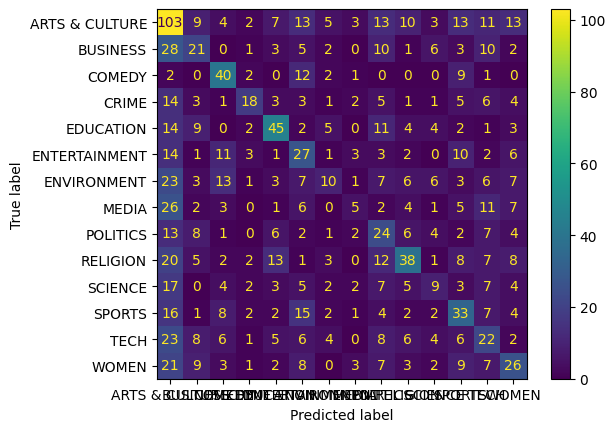

In [32]:
Mteric_s = Mteric4.time()

pe_ON_NeWs_ATL = Mo_News.predict(is_ON_NeWs_ATL)
print(Mteric1(os_ON_NeWs_ATL,pe_ON_NeWs_ATL))
L = Mteric2(os_ON_NeWs_ATL,pe_ON_NeWs_ATL)
D = Mteric3(confusion_matrix = L, display_labels = ['ARTS & CULTURE','BUSINESS','COMEDY','CRIME','EDUCATION', 'ENTERTAINMENT','ENVIRONMENT','MEDIA','POLITICS','RELIGION','SCIENCE','SPORTS','TECH','WOMEN'])
D.plot()

Mteric_d = Mteric4.time()
print("time-dur-testing =", Mteric_d- Mteric_s)

## **Neural Network Algorithms**

**Multi Layer Perceptron**

In [33]:
from sklearn.neural_network import MLPClassifier as Mteric10

ONA_K = {'learning_rate': ['constant', 'invscaling', 'adaptive'],
            'solver': ['adam','lbfgs', 'sgd']}

ONA_KM = Mteric10(random_state= 223)
ONA_KM = GGR(ONA_KM, ONA_K, cv=2 )
ONA_KM.fit(ir_ON_NeWs_ATL[:500],or_ON_NeWs_ATL[:500])

print(ONA_KM.best_params_)
print(ONA_KM.best_score_)

{'learning_rate': 'constant', 'solver': 'lbfgs'}
0.248


In [34]:
Mteric_s = Mteric4.time()

Mo_News = Mteric10(**ONA_KM.best_params_)
Mo_News.fit(ir_ON_NeWs_ATL, or_ON_NeWs_ATL)

Mteric_d = Mteric4.time()
print("time-dur-training =", Mteric_d- Mteric_s)
Mo_News

time-dur-training = 11.222458839416504


MLPClassifier(solver='lbfgs')

                precision    recall  f1-score   support

ARTS & CULTURE       0.32      0.55      0.41       184
      BUSINESS       0.32      0.23      0.27       112
        COMEDY       0.32      0.15      0.21        79
         CRIME       0.32      0.36      0.34        72
     EDUCATION       0.39      0.62      0.48        98
 ENTERTAINMENT       0.28      0.18      0.22       107
   ENVIRONMENT       0.14      0.06      0.09        96
         MEDIA       0.27      0.08      0.13        84
      POLITICS       0.22      0.28      0.25        95
      RELIGION       0.35      0.32      0.33       107
       SCIENCE       0.24      0.14      0.17        74
        SPORTS       0.23      0.28      0.25        76
          TECH       0.37      0.35      0.36        89
         WOMEN       0.24      0.32      0.27        90

      accuracy                           0.30      1363
     macro avg       0.29      0.28      0.27      1363
  weighted avg       0.29      0.30      0.28 

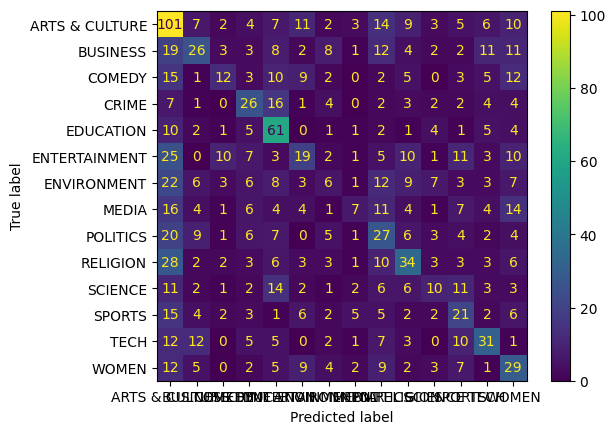

In [35]:
Mteric_s = Mteric4.time()

pe_ON_NeWs_ATL = Mo_News.predict(iv_ON_NeWs_ATL)
print(Mteric1(ov_ON_NeWs_ATL,pe_ON_NeWs_ATL))
L = Mteric2(ov_ON_NeWs_ATL,pe_ON_NeWs_ATL)
D = Mteric3(confusion_matrix = L, display_labels = ['ARTS & CULTURE','BUSINESS','COMEDY','CRIME','EDUCATION', 'ENTERTAINMENT','ENVIRONMENT','MEDIA','POLITICS','RELIGION','SCIENCE','SPORTS','TECH','WOMEN'])
D.plot()

Mteric_d = Mteric4.time()
print("time-dur-validating =", Mteric_d- Mteric_s)

                precision    recall  f1-score   support

ARTS & CULTURE       0.34      0.52      0.41       209
      BUSINESS       0.20      0.18      0.19        92
        COMEDY       0.18      0.09      0.12        69
         CRIME       0.24      0.24      0.24        67
     EDUCATION       0.39      0.56      0.46       102
 ENTERTAINMENT       0.26      0.24      0.25        84
   ENVIRONMENT       0.16      0.09      0.12        96
         MEDIA       0.12      0.07      0.09        73
      POLITICS       0.36      0.39      0.38        80
      RELIGION       0.43      0.33      0.38       120
       SCIENCE       0.17      0.13      0.15        70
        SPORTS       0.38      0.31      0.34        99
          TECH       0.26      0.26      0.26       101
         WOMEN       0.28      0.35      0.31       101

      accuracy                           0.30      1363
     macro avg       0.27      0.27      0.26      1363
  weighted avg       0.28      0.30      0.29 

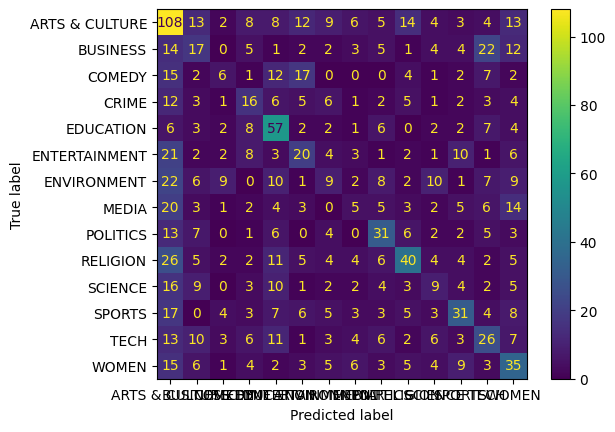

In [36]:
Mteric_s = Mteric4.time()

pe_ON_NeWs_ATL = Mo_News.predict(is_ON_NeWs_ATL)
print(Mteric1(os_ON_NeWs_ATL,pe_ON_NeWs_ATL))
L = Mteric2(os_ON_NeWs_ATL,pe_ON_NeWs_ATL)
D = Mteric3(confusion_matrix = L, display_labels = ['ARTS & CULTURE','BUSINESS','COMEDY','CRIME','EDUCATION', 'ENTERTAINMENT','ENVIRONMENT','MEDIA','POLITICS','RELIGION','SCIENCE','SPORTS','TECH','WOMEN'])
D.plot()

Mteric_d = Mteric4.time()
print("time-dur-testing =", Mteric_d- Mteric_s)